In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [214]:
phones = pd.read_csv('phones.csv')
lead = pd.read_csv('new awp leads.csv')

In [215]:
df1 = lead[['Name', 'Created On','Last Reached Call Result','Count PhoneCalls', 'Mobile Phone']]
df1['Mobile Phone'] = df1['Mobile Phone'].str[-3:]

df1 = df1.groupby(['Name','Mobile Phone','Last Reached Call Result','Count PhoneCalls'])['Created On'].min().reset_index()
df1.head(3)

#df1 = df1.drop_duplicates(subset='Name', keep='last')
#df1 = df1[df1[['Name','Mobile Phone']].duplicated(keep='last')]

C:\Users\ziad.saad\AppData\Local\Temp\ipykernel_32884\370924542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Mobile Phone'] = df1['Mobile Phone'].str[-3:]


,Name,Mobile Phone,Last Reached Call Result,Count PhoneCalls,Created On
0,0,111,Not Interested,1,2025-02-12 00:35:13
1,0,852,Not Reached,1,2025-02-10 11:20:14
2,ABDALA ABDELRAHMAN YOSEF,577,Untouched,0,2024-11-21 16:19:19


In [216]:
phones['first call'] = pd.to_datetime(phones['first call'])
df1['Created On'] = pd.to_datetime(df1['Created On'])

df2 = phones.groupby(['Name','Owner','Mobile Phone'])['first call'].min().reset_index()

df2 = df2.sort_values(by='first call', ascending=False)

#df2 = df2.drop_duplicates(subset='Name', keep='last')
#df2.to_csv('test2.csv')

df2[df2['Name'] =='Nesma Tarek']

,Name,Owner,Mobile Phone,first call
3413,Nesma Tarek,Esraa Faisal Wafa Ahmed,563,2024-12-31 13:36:45
3414,Nesma Tarek,Youssef Nasser,500,2024-11-05 13:04:13


In [217]:
df = pd.merge(df1,df2, on = ['Name','Mobile Phone'], how = 'inner')

merged = df[df['first call'] > df['Created On']]

merged = merged.loc[merged.groupby(['Name', 'Mobile Phone'])['first call'].idxmin()]

merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3034 entries, 0 to 3064
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      3034 non-null   object        
 1   Mobile Phone              3034 non-null   object        
 2   Last Reached Call Result  3034 non-null   object        
 3   Count PhoneCalls          3034 non-null   int64         
 4   Created On                3034 non-null   datetime64[ns]
 5   Owner                     3034 non-null   object        
 6   first call                3034 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 189.6+ KB


In [218]:
merged['Days range'] = (merged['first call'] - merged['Created On']).dt.days
merged['Days range'].unique()

array([  0,   7,  10,   1,   2,   9,   4,  43,   6,  13,  11,   3,  72,
        45,   5,  68,  42,  44,  80,   8,  41,  76,  48,  15,  81,  51,
        24, 116,  61,  31,  70,  14], dtype=int64)

In [219]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3034 entries, 0 to 3064
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      3034 non-null   object        
 1   Mobile Phone              3034 non-null   object        
 2   Last Reached Call Result  3034 non-null   object        
 3   Count PhoneCalls          3034 non-null   int64         
 4   Created On                3034 non-null   datetime64[ns]
 5   Owner                     3034 non-null   object        
 6   first call                3034 non-null   datetime64[ns]
 7   Days range                3034 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 213.3+ KB


In [220]:
def rename(df, old,new):
    for i in old:
        return df.rename(columns={old:new}, inplace=True )

rename(merged,"Created On","Assignment date")
rename(merged,"Name",'Doctor name')
rename(merged,'Owner','Agent name')

cols = ['Doctor name','Mobile Phone','Agent name','Count PhoneCalls','Assignment date','first call','Days range', 'Last Reached Call Result']

df = merged[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3034 entries, 0 to 3064
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Doctor name               3034 non-null   object        
 1   Mobile Phone              3034 non-null   object        
 2   Agent name                3034 non-null   object        
 3   Count PhoneCalls          3034 non-null   int64         
 4   Assignment date           3034 non-null   datetime64[ns]
 5   first call                3034 non-null   datetime64[ns]
 6   Days range                3034 non-null   int64         
 7   Last Reached Call Result  3034 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 213.3+ KB


In [221]:
df.to_csv('merged data final.csv')

# 1- difference between creation of lead and first call:

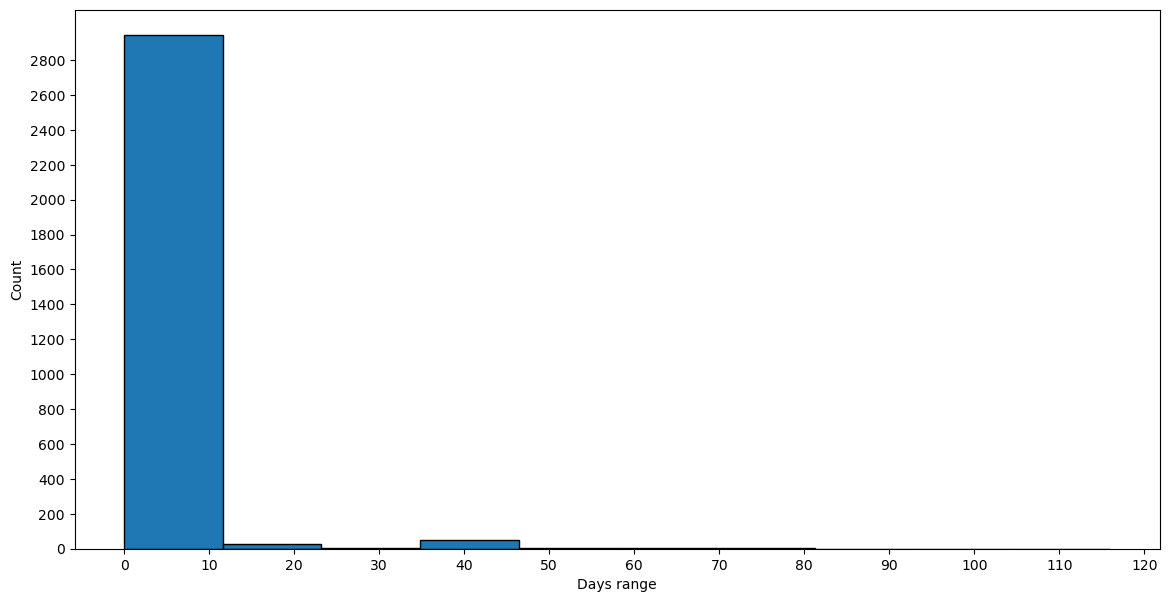

Summary statistics about days range:

Min days = 0
Max days = 116
Average days = 2.110085695451549
Most frequent range = 0

All days range we have:
 [  0   7  10   1   2   9   4  43   6  13  11   3  72  45   5  68  42  44
  80   8  41  76  48  15  81  51  24 116  61  31  70  14]

Days range VS Counts
Days range
0      1966
1       364
2       234
3       115
4        65
5        47
6        51
7        31
8         9
9        17
10       27
11       15
13       23
14        1
15        1
24        2
31        1
41        1
42       10
43       33
44        5
45        1
48        5
51        1
61        1
68        1
70        1
72        1
76        1
80        2
81        1
116       1
Name: count, dtype: int64


In [222]:
plt.figure(figsize=(14,7))
plt.hist(df['Days range'], edgecolor ='black')
plt.xticks(np.arange(0,df['Days range'].max()+5,10))
plt.yticks(np.arange(0,3000,200))
plt.xlabel('Days range')
plt.ylabel('Count')
plt.show()

print(f"Summary statistics about days range:\n")
print(f"Min days = {df['Days range'].min()}")
print(f"Max days = {df['Days range'].max()}")
print(f"Average days = {df['Days range'].mean()}")
print(f"Most frequent range = {df['Days range'].mode()[0]}\n")
print(f'All days range we have:\n {df['Days range'].unique()}\n')

counts = df['Days range'].value_counts().sort_index()
print(f'Days range VS Counts\n{counts}')

# Distribution of calls hours

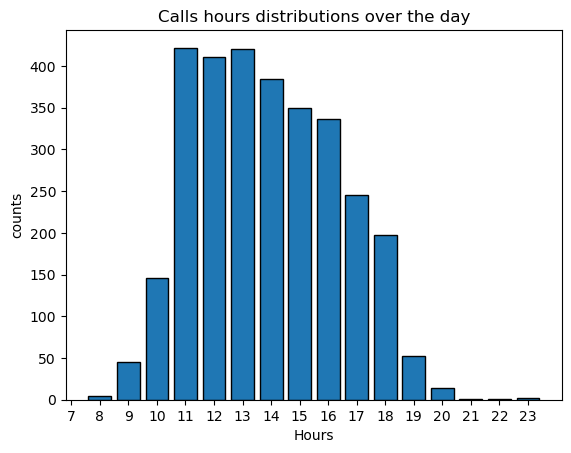

In [223]:
hours = df['first call'].dt.hour.value_counts()
hours_key = hours.index
counts = hours.values
plt.bar(hours_key, counts, edgecolor='black')
plt.xticks(np.arange(hours_key.min()-1, hours_key.max()+1,1))
plt.title('Calls hours distributions over the day')
plt.xlabel('Hours')
plt.ylabel('counts')
plt.show()

# 2- Best time to call:

#### Best time for answered calls:

In [224]:
to_answer = df[df['Last Reached Call Result'].isin(['Interested','Not Interested','Unsure' ,'Interested Follow Up Required','Low Budget'
                                                    'Interested but not available','Complain','Booked'])]
#to_answer
print(len(to_answer))

1862


Most frequent 5 hours in answered calls:
 first call
11    291
13    270
12    263
14    248
15    215
Name: count, dtype: int64 



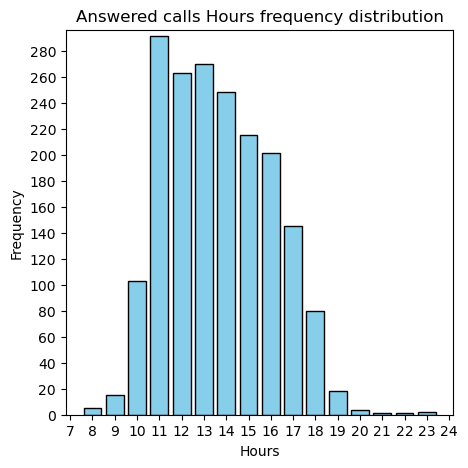

C:\Users\ziad.saad\AppData\Local\Temp\ipykernel_32884\3224047287.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(counts)).colors


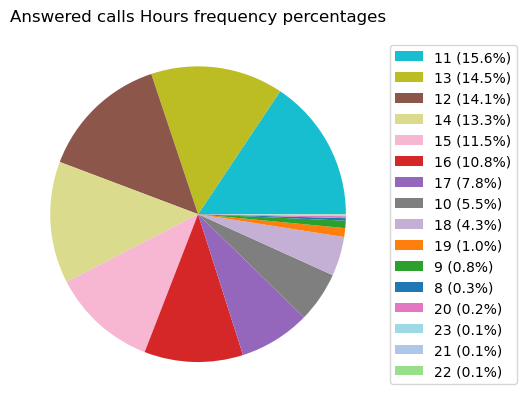

In [225]:
counts = (to_answer['first call'].dt.hour).value_counts()
legend = counts.index
total = counts.sum()
percentages = (counts / total) * 100

print(f"Most frequent 5 hours in answered calls:\n {counts[:5]} \n")

plt.figure(figsize=(5,5))
plt.title('Answered calls Hours frequency distribution')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.xticks(np.arange(7,25,1))
plt.ylim(0, counts.max()+5)
plt.yticks(np.arange(0, counts.max(), 20))
plt.show()


legend_labels = [f"{hour} ({perc:.1f}%)" for hour, perc in zip(counts.index, percentages)]
colors = plt.cm.get_cmap("tab20", len(counts)).colors
np.random.shuffle(colors) 
plt.pie(counts, colors=colors, pctdistance=1.2)
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Answered calls Hours frequency percentages')
plt.show()

#### Best time for Interested result calls:

In [226]:
to_be_interest = df[df['Last Reached Call Result'].isin(['Interested' ,'Interested Follow Up Required', 'Interested but not available'])]
#to_be_interest

Most frequent 5 hours for interested answered calls:
 first call
14    41
12    34
11    29
13    28
15    23
Name: count, dtype: int64 



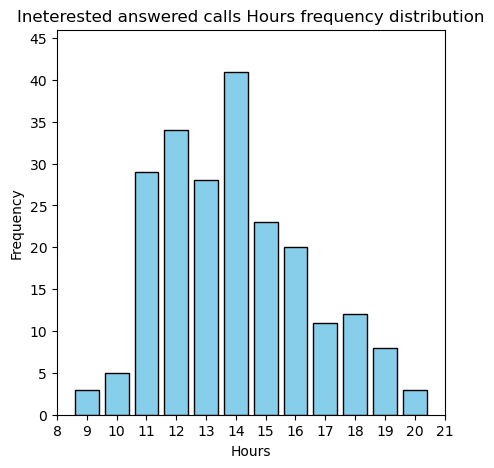

C:\Users\ziad.saad\AppData\Local\Temp\ipykernel_32884\2173369743.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(counts)).colors


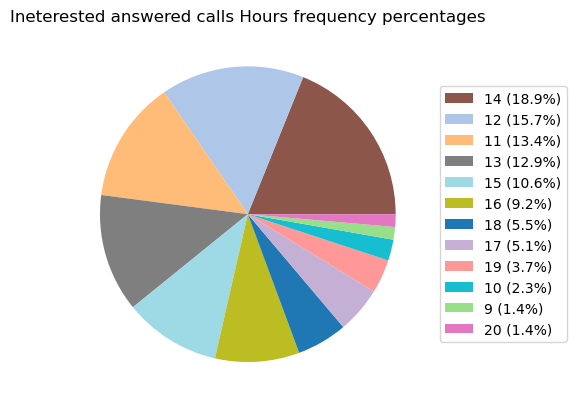

In [227]:
counts = (to_be_interest['first call'].dt.hour).value_counts()
legend = counts.index
total = counts.sum()
percentages = (counts / total) * 100

print(f"Most frequent 5 hours for interested answered calls:\n {counts[:5]} \n")

plt.figure(figsize=(5,5))
plt.title('Ineterested answered calls Hours frequency distribution')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.xticks(np.arange(8,22,1))
plt.ylim(0,counts.max()+5)
plt.yticks(np.arange(0,counts.max()+5,5))
plt.show()


legend_labels = [f"{hour} ({perc:.1f}%)" for hour, perc in zip(counts.index, percentages)]
colors = plt.cm.get_cmap("tab20", len(counts)).colors
np.random.shuffle(colors) 
plt.pie(counts, colors=colors, pctdistance=1.2)
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Ineterested answered calls Hours frequency percentages')
plt.show()

# 3- Reachability for each agent

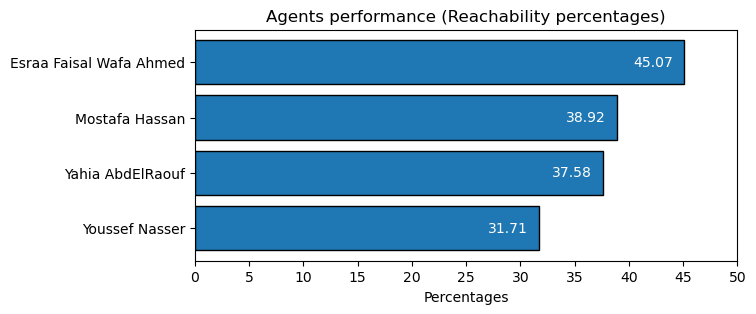

,Owner,Count PhoneCalls,Reached Phone Count,Reachability
13,Youssef Nasser,1577,500.0,31.71
12,Yahia AbdElRaouf,1663,625.0,37.58
9,Mostafa Hassan,799,311.0,38.92
6,Esraa Faisal Wafa Ahmed,3783,1705.0,45.07


In [228]:
reach = pd.read_csv('new awp leads.csv')

reach = (reach.groupby('Owner')[['Count PhoneCalls', 'Reached Phone Count']].sum()).reset_index()
reach['Reachability'] = round((100*(reach['Reached Phone Count'] / reach['Count PhoneCalls'])),2)
reach = reach.sort_values(by='Reachability', ascending=True)
reach.dropna(axis=0, inplace=True)
reach = reach[reach['Owner'].isin(['Esraa Faisal Wafa Ahmed','Yahia AbdElRaouf','Mostafa Hassan','Youssef Nasser'])]

plt.figure(figsize=(7,3))
bars = plt.barh(reach['Owner'], reach['Reachability'], edgecolor='black')
for bar, value in zip(bars, reach['Reachability']):
    plt.text(value-1, bar.get_y() + bar.get_height()/2, str(value), va='center', ha='right', color='white')

plt.xticks(np.arange(0, reach['Reachability'].max()+5, 5))
plt.xlabel('Percentages')
plt.title('Agents performance (Reachability percentages)')
plt.show()

reach

# 4- Interest rate (Based on reached calls):

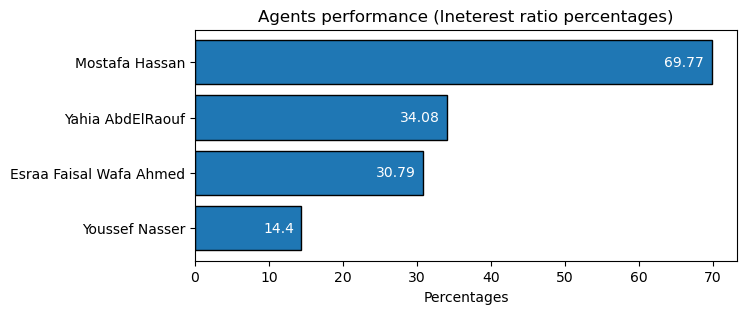

,Owner,Reached Phone Count,Phone Call Result,Interest rate
0,Youssef Nasser,500.0,72,14.40
3,Esraa Faisal Wafa Ahmed,1705.0,525,30.79
1,Yahia AbdElRaouf,625.0,213,34.08
2,Mostafa Hassan,311.0,217,69.77


In [229]:
interest = reach[['Owner','Reached Phone Count']]

filter_values = ['Interested', 'Interested Follow Up Required', 'Interested but not available']
filter = phones[phones['Phone Call Result'].isin(filter_values)]
filter = filter.groupby('Owner')['Phone Call Result'].count().reset_index()
merged_reached = pd.merge(interest, filter, on = 'Owner', how='inner')
merged_reached = merged_reached[['Owner','Reached Phone Count', 'Phone Call Result']]

merged_reached['Interest rate'] = round((merged_reached['Phone Call Result'] / merged_reached['Reached Phone Count'] *100),2)
merged_reached = merged_reached.sort_values(by='Interest rate')

plt.figure(figsize=(7,3))
bars = plt.barh(merged_reached['Owner'], merged_reached['Interest rate'], edgecolor='black')
for bar, value in zip(bars, merged_reached['Interest rate']):
    plt.text(value-1, bar.get_y() + bar.get_height()/2, str(value), va='center', ha='right', color='white')

plt.xticks(np.arange(0, merged_reached['Interest rate'].max()+5, 10))
plt.xlabel('Percentages')
plt.title('Agents performance (Ineterest ratio percentages)')
plt.show()

merged_reached
#merged_reached[merged_reached['Owner'] =='']

In [230]:
'''
le = LabelEncoder()
cols = ['Owner', 'Phone Call Result','Not Intersted Reason', 'Follow Up Action','Next Step', 'first call', 
        'Description', 'Priority', 'Activity Status','Direction']

for col in cols:
    phones[col] = le.fit_transform(phones[col])

phones[['Owner','Phone Call Result','Not Intersted Reason','Follow Up Action','Next Step','first call','Activity Status']].corr()
'''

"\nle = LabelEncoder()\ncols = ['Owner', 'Phone Call Result','Not Intersted Reason', 'Follow Up Action','Next Step', 'first call', \n        'Description', 'Priority', 'Activity Status','Direction']\n\nfor col in cols:\n    phones[col] = le.fit_transform(phones[col])\n\nphones[['Owner','Phone Call Result','Not Intersted Reason','Follow Up Action','Next Step','first call','Activity Status']].corr()\n"

# 5- What's the best days for answered calls:

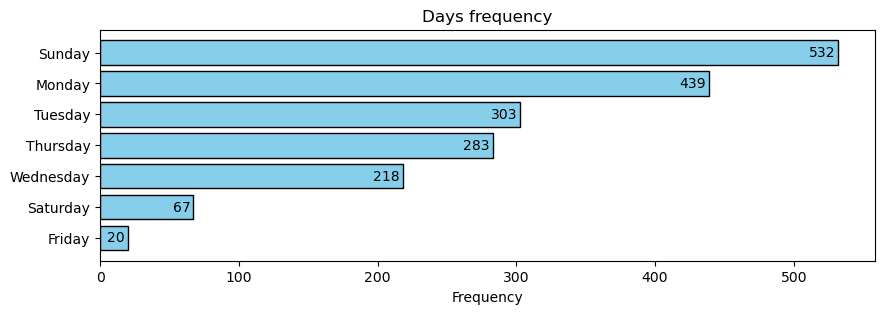

C:\Users\ziad.saad\AppData\Local\Temp\ipykernel_32884\3851214361.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(best_days)).colors


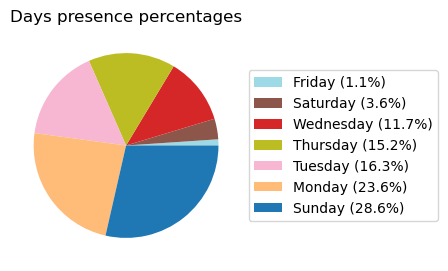

In [232]:
to_answer = df[df['Last Reached Call Result'].isin(['Interested','Not Interested','Unsure' ,'Interested Follow Up Required','Low Budget'
                                                    'Interested but not available','Complain','Booked'])]

best_days = to_answer['first call'].dt.day_name().value_counts().sort_values()
total = best_days.sum()
percentages = (best_days / total) * 100

plt.figure(figsize=(10,3))
bars = plt.barh(best_days.index, best_days.values, edgecolor='black', color='skyblue')
for bar, value in zip(bars, best_days.values):
    plt.text(value-2, bar.get_y() + bar.get_height()/2, str(value), va='center', ha='right', color='black')
plt.title('Days frequency')
plt.xlabel('Frequency')
plt.show()


plt.figure(figsize=(12,3))
legend_labels = [f"{day} ({perc:.1f}%)" for day, perc in zip(best_days.index, percentages)]
colors = plt.cm.get_cmap("tab20", len(best_days)).colors
np.random.shuffle(colors) 
plt.title('Days presence percentages')
plt.pie(best_days, colors=colors, pctdistance=1.2)
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

# 6- What are the best days for interest calls:

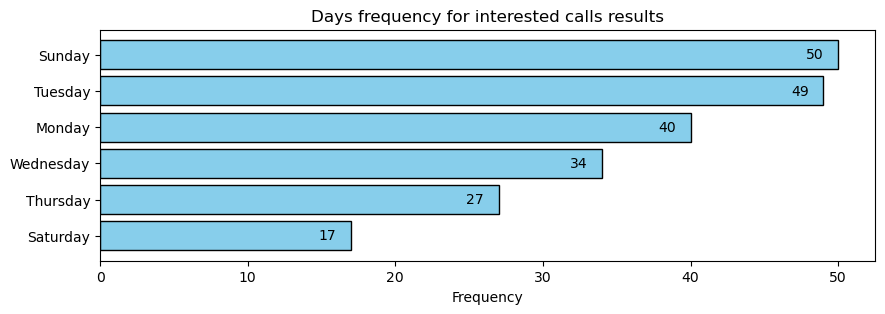

C:\Users\ziad.saad\AppData\Local\Temp\ipykernel_32884\3394683550.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(interest_days)).colors


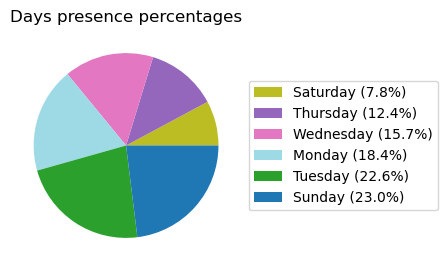

In [233]:
to_answer = df[df['Last Reached Call Result'].isin(['Interested','Interested Follow Up Required', 'Interested but not available'])]
interest_days = to_answer['first call'].dt.day_name().value_counts().sort_values()
total = interest_days.sum()
percentages = (interest_days / total) * 100

plt.figure(figsize=(10,3))
bars = plt.barh(interest_days.index, interest_days.values, edgecolor='black', color='skyblue')
for bar, value in zip(bars, interest_days.values):
    plt.text(value-1, bar.get_y() + bar.get_height()/2, str(value), va='center', ha='right', color='black')
plt.title('Days frequency for interested calls results')
plt.xlabel('Frequency')
plt.show()


plt.figure(figsize=(12,3))
legend_labels = [f"{day} ({perc:.1f}%)" for day, perc in zip(interest_days.index, percentages)]
colors = plt.cm.get_cmap("tab20", len(interest_days)).colors
np.random.shuffle(colors) 
plt.title('Days presence percentages')
plt.pie(interest_days, colors=colors, pctdistance=1.2)
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

# 7- Hours that cause no answer result

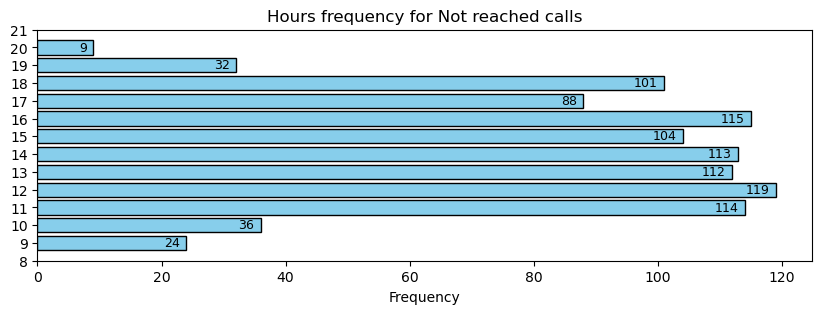

C:\Users\ziad.saad\AppData\Local\Temp\ipykernel_32884\3785713011.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(worst_hours)).colors


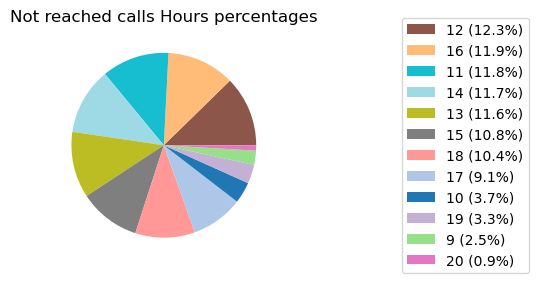

In [244]:
worst_hours = df[df['Last Reached Call Result'].isin(['Not Reached','no answer'])]
worst_hours = worst_hours['first call'].dt.hour.value_counts()
hours_sum = worst_hours.sum()
percentages = (worst_hours/hours_sum)*100

plt.figure(figsize=(10,3))
bars = plt.barh(worst_hours.index, worst_hours.values, edgecolor='black', color='skyblue')
for bar, value in zip(bars, worst_hours.values):
    plt.text(value-1, bar.get_y() + bar.get_height()/2, str(value), va='center', ha='right', color='black', fontsize=9)
plt.title('Hours frequency for Not reached calls')
plt.xlabel('Frequency')
plt.yticks(np.arange(8,22,1))
plt.show()


plt.figure(figsize=(12,3))
legend_labels = [f"{day} ({perc:.1f}%)" for day, perc in zip(worst_hours.index, percentages)]
colors = plt.cm.get_cmap("tab20", len(worst_hours)).colors
np.random.shuffle(colors) 
plt.title('Not reached calls Hours percentages')
plt.pie(worst_hours, colors=colors, pctdistance=1.2)
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1.5, 0.5), fontsize=10)
plt.show()

# 8- Best and Worst hours to call for each agent:

In [259]:
def agent(df, name):
    agent_data = df[df['Agent name'] == name]
    normal = agent_data['first call'].dt.hour.value_counts().sort_index()
    
    worst = agent_data[agent_data['Last Reached Call Result'].isin(['Not Reached', 'no answer'])]
    worst_hours = worst['first call'].dt.hour.value_counts().sort_index()

    best = agent_data[~agent_data['Last Reached Call Result'].isin(['Not Reached', 'no answer'])]
    best_hours = best['first call'].dt.hour.value_counts().sort_index()

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].bar(worst_hours.index, worst_hours.values, color='darkred', edgecolor='black')
    ax[0].set_title(f'Worst Hours to Call\n Agent: {name}')
    ax[0].set_xlabel('Hours')
    ax[0].set_ylabel('Frequency')
    ax[0].set_xticks(range(8, 22))
    ax[0].set_yticks(range(0, max(worst_hours.values) + 5, 5))

    ax[1].bar(best_hours.index, best_hours.values, color='green', edgecolor='black')
    ax[1].set_title(f'Best Hours to Call\n Agent: {name}')
    ax[1].set_xlabel('Hours')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xticks(range(8, 22))
    ax[1].set_yticks(range(0, max(best_hours.values) + 5, 5))

    ax[2].bar(normal.index, normal.values, color='green', edgecolor='black')
    ax[2].set_title(f'All Hours for all results Call\n Agent: {name}')
    ax[2].set_xlabel('Hours')
    ax[2].set_ylabel('Frequency')
    ax[2].set_xticks(range(8, 22))
    ax[2].set_yticks(range(0, max(normal.values) + 5, 10))

    plt.tight_layout()
    plt.show()

#### 1-Yahia

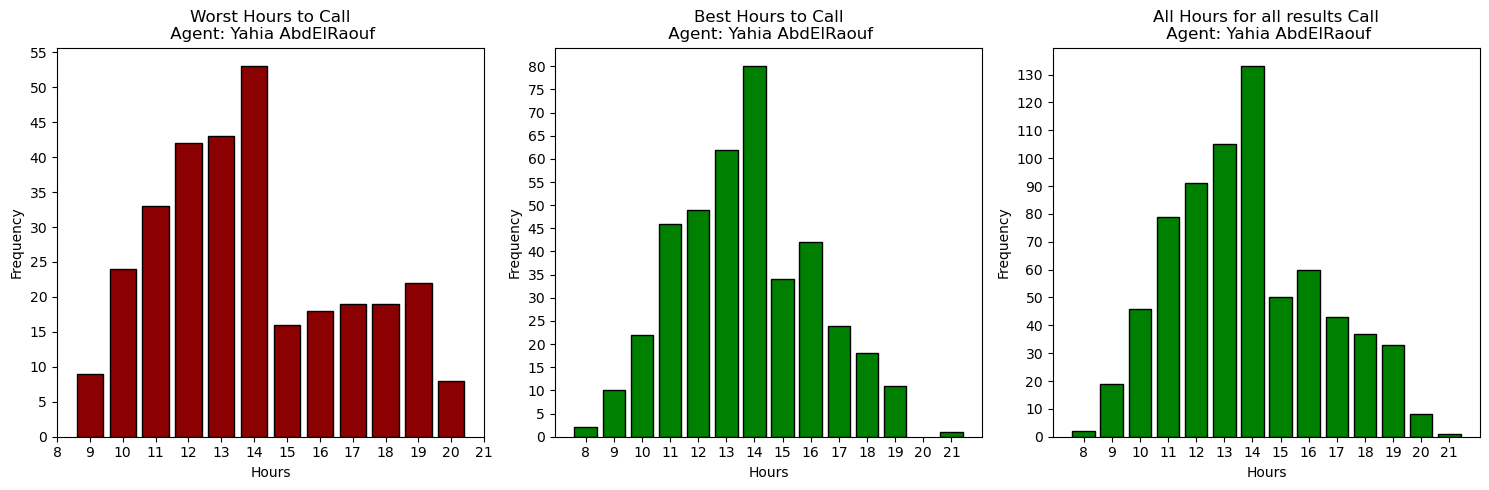

In [260]:
agent(df,'Yahia AbdElRaouf')


#### 2- Esraa

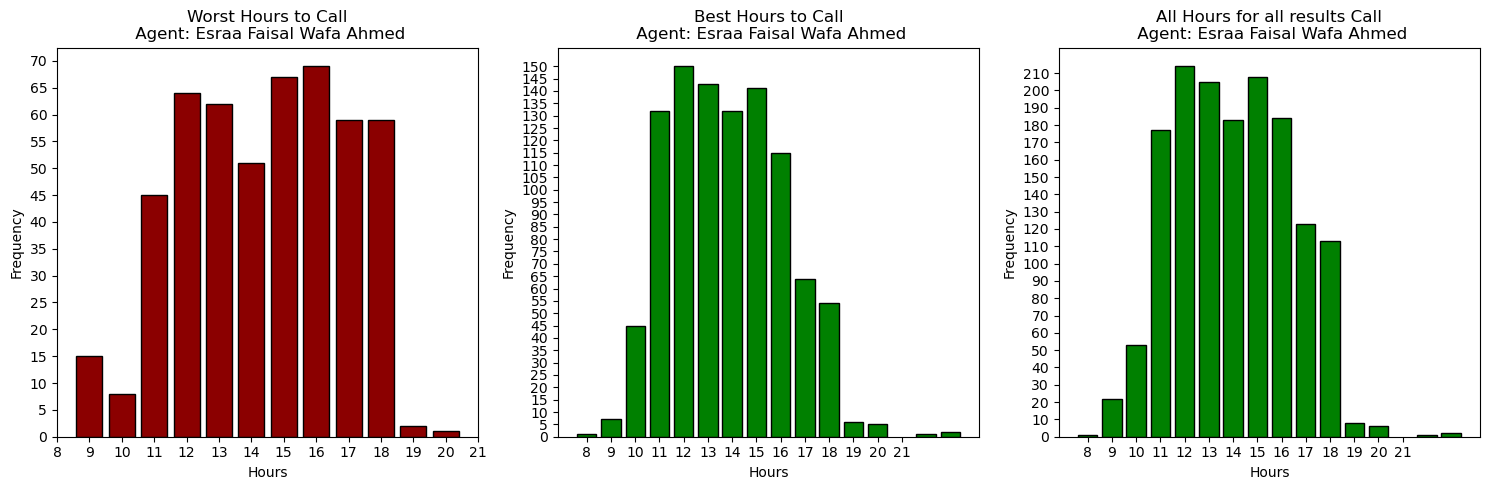

In [261]:
agent(df, 'Esraa Faisal Wafa Ahmed')

#### 3- Mostafa

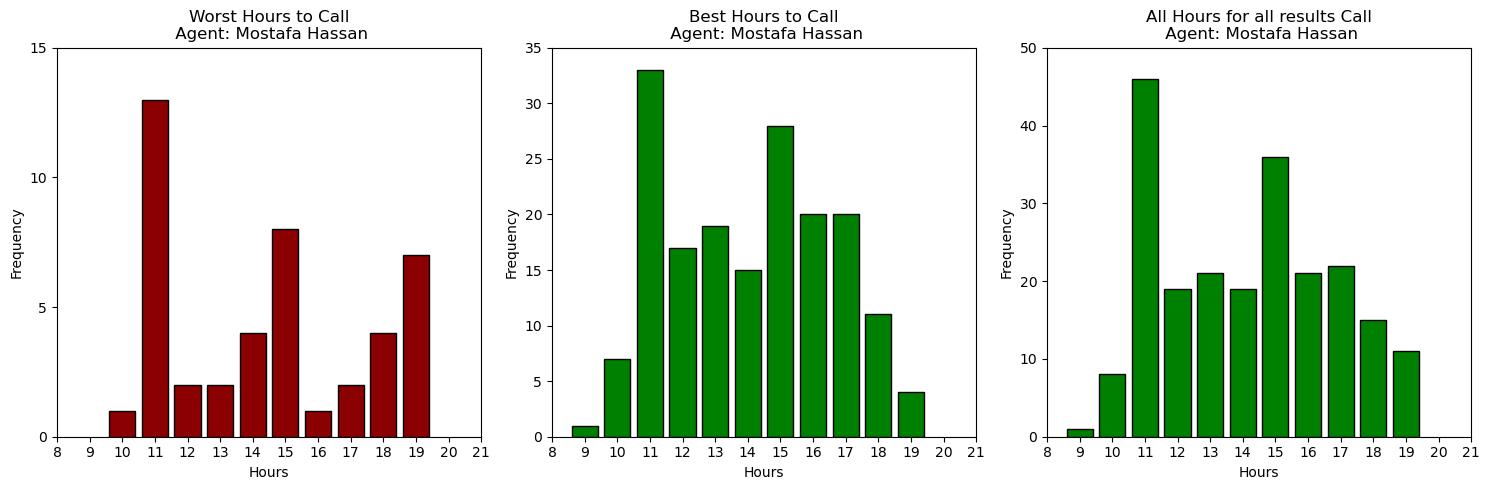

In [262]:
agent(df, 'Mostafa Hassan')

#### 4- Yousef

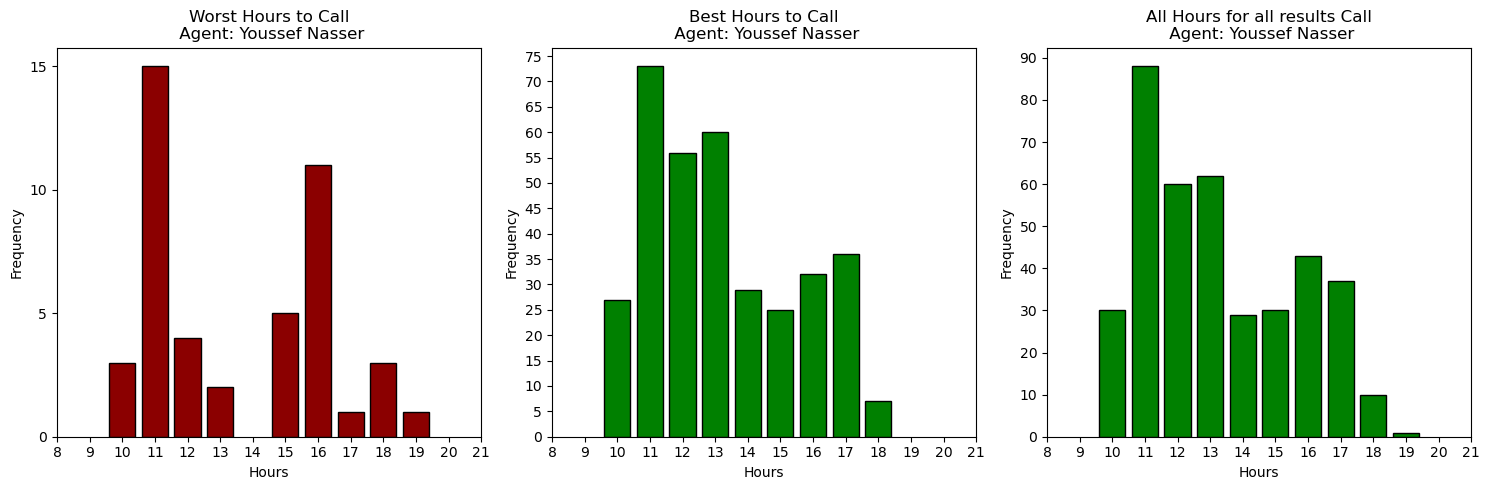

In [263]:
agent(df,'Youssef Nasser')

# 9- Relationship between Day name & calls counts

first call
Sunday       819
Monday       675
Tuesday      559
Thursday     453
Wednesday    357
Saturday     115
Friday        56
Name: count, dtype: int64


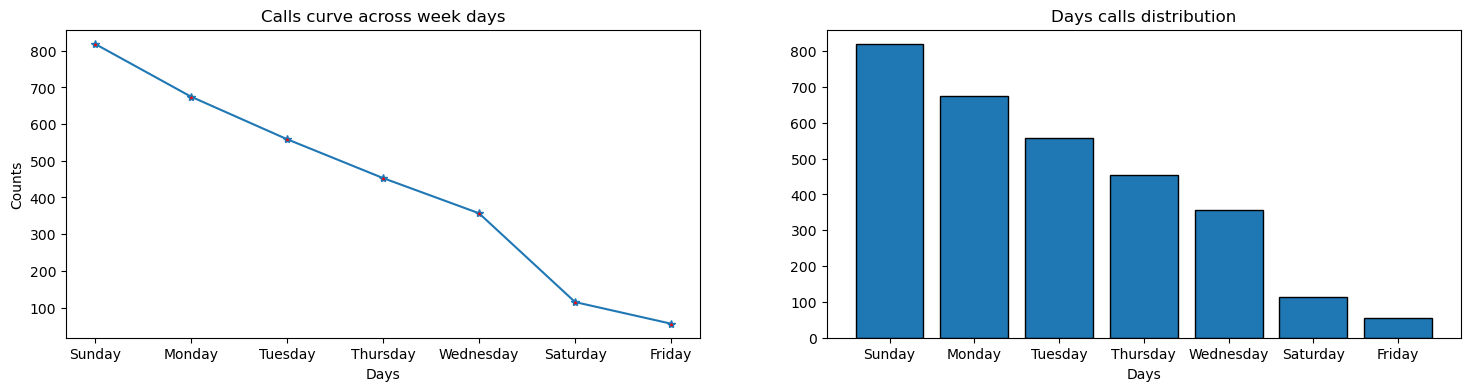

In [265]:
days = df['first call'].dt.day_name().value_counts()

fig, ax = plt.subplots(1,2,figsize=(18,4))

ax[0].plot(days.index, days.values, marker='*', markerfacecolor='red')
ax[0].set_title('Calls curve across week days')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Counts')

ax[1].bar(days.index, days.values, edgecolor='black')
ax[1].set_xlabel('Days')
ax[1].set_title('Days calls distribution')

print(days)